# Part 4: Managing Time Series Data With Pandas

## Time Series Basics

### Importing Time Series Data from csv-Files

In [1]:
import pandas as pd

In [2]:
temp = pd.read_csv("temp.csv", parse_dates=["datetime"], index_col= "datetime") # Parses the column named "datetime" as dates

In [3]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [7]:
type(temp.iloc[0, 0]) # value=11.7

numpy.float64

In [8]:
temp.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

In [9]:
temp.index[0]

Timestamp('2013-01-01 00:00:00')

### Converting strings to datetime objects with pd.to_datetime()

In [10]:
import pandas as pd

In [11]:
temp = pd.read_csv("temp.csv")

In [12]:
temp.head()

,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3


In [13]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   LA        35062 non-null  float64
 2   NY        35064 non-null  float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB


In [14]:
temp.datetime[0]

'2013-01-01 00:00:00'

In [15]:
pd.to_datetime(temp.datetime)

0       2013-01-01 00:00:00
1       2013-01-01 01:00:00
2       2013-01-01 02:00:00
3       2013-01-01 03:00:00
4       2013-01-01 04:00:00
                ...        
35059   2016-12-31 19:00:00
35060   2016-12-31 20:00:00
35061   2016-12-31 21:00:00
35062   2016-12-31 22:00:00
35063   2016-12-31 23:00:00
Name: datetime, Length: 35064, dtype: datetime64[ns]

In [16]:
temp = temp.set_index(pd.to_datetime(temp.datetime)).drop("datetime", axis = 1)

In [17]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [18]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [19]:
temp.index[0]

Timestamp('2013-01-01 00:00:00')

In [20]:
pd.to_datetime("2015-05-20 10:30:20") # Understands this format

Timestamp('2015-05-20 10:30:20')

In [21]:
pd.to_datetime("20150520") # Understands this format

Timestamp('2015-05-20 00:00:00')

In [22]:
pd.to_datetime("2015/05/20") # Understands this format

Timestamp('2015-05-20 00:00:00')

In [23]:
pd.to_datetime("2015 05 20") # Understands this format

Timestamp('2015-05-20 00:00:00')

In [25]:
#pd.to_datetime("2015-20-05") # Wrong month

In [26]:
pd.to_datetime("2015 May 20") # Understands this format

Timestamp('2015-05-20 00:00:00')

In [27]:
pd.to_datetime("May 2015 20") # Understands this format

Timestamp('2015-05-20 00:00:00')

In [28]:
pd.to_datetime("2015 20th may") # Understands this format

Timestamp('2015-05-20 00:00:00')

In [29]:
pd.to_datetime(["2015-05-20", "Feb 20 2015"]) # 2 dates to convert to datetime

DatetimeIndex(['2015-05-20', '2015-02-20'], dtype='datetime64[ns]', freq=None)

In [30]:
pd.to_datetime(["2015-05-20", "Feb 20 2015", "Elephant"], errors="coerce")

DatetimeIndex(['2015-05-20', '2015-02-20', 'NaT'], dtype='datetime64[ns]', freq=None)

### Initial Analysis / Visual Inspection of Time Series

In [31]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [32]:
temp.tail()

,LA,NY
datetime,,
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8
2016-12-31 22:00:00,12.3,5.7
2016-12-31 23:00:00,11.9,5.5


In [33]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [34]:
temp.describe()

,LA,NY
count,35062.000000,35064.000000
mean,17.486016,12.068269
std,6.640666,10.466832
min,-6.600000,-22.400000
25%,12.900000,3.900000
50%,17.200000,12.500000
75%,21.900000,20.600000
max,42.300000,37.100000


In [35]:
temp.LA.value_counts()

 16.2    238
 16.7    237
 15.2    234
 18.2    231
 16.6    228
        ... 
-2.6       1
 39.5      1
-5.4       1
-4.4       1
-3.6       1
Name: LA, Length: 442, dtype: int64

In [36]:
import matplotlib.pyplot as plt

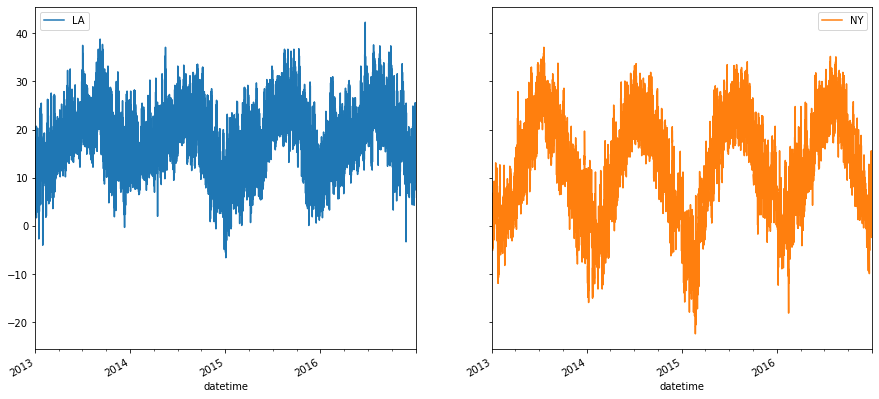

In [37]:
temp.plot(figsize = (15, 7), subplots=True, layout=(1, 2), sharey=True) # Layout of 1 row, 2 columns for subplots
plt.show()

### Indexing and Slicing Time Series

In [38]:
import pandas as pd

In [39]:
temp = pd.read_csv("temp.csv", parse_dates= ["datetime"], index_col= "datetime")

In [40]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [41]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [42]:
temp.loc["2013-01-01 01:00:00"]

LA    10.7
NY    -1.7
Name: 2013-01-01 01:00:00, dtype: float64

In [43]:
temp.loc["2015"] # You can use loc on a piece of the datetime index!!!

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [44]:
temp.loc["2015-05"]

,LA,NY
datetime,,
2015-05-01 00:00:00,25.5,13.9
2015-05-01 01:00:00,25.7,13.9
2015-05-01 02:00:00,23.8,10.5
2015-05-01 03:00:00,22.0,10.2
2015-05-01 04:00:00,20.1,8.6
...,...,...
2015-05-31 19:00:00,25.4,25.5
2015-05-31 20:00:00,26.0,23.9
2015-05-31 21:00:00,24.9,22.5


In [45]:
temp.loc["2015-05-20"].shape

(24, 2)

In [46]:
temp.loc["2015-05-20 10:00:00"]

LA     7.8
NY    13.3
Name: 2015-05-20 10:00:00, dtype: float64

In [48]:
#temp.loc["2015-05-20 10:30:00"] # Inexistent value!

In [49]:
temp.loc["2015-01-01" : "2015-12-31"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [50]:
temp.loc["2015-01-01" : "2015-12-31"].equals(temp.loc["2015"])

True

In [51]:
temp.loc["2015-04-15" : "2016-02-23"]

,LA,NY
datetime,,
2015-04-15 00:00:00,19.1,12.8
2015-04-15 01:00:00,20.0,12.0
2015-04-15 02:00:00,17.7,11.3
2015-04-15 03:00:00,15.5,11.2
2015-04-15 04:00:00,13.3,10.4
...,...,...
2016-02-23 19:00:00,23.4,2.6
2016-02-23 20:00:00,23.4,2.2
2016-02-23 21:00:00,26.8,2.2


In [52]:
temp.loc["2015-05-20":]

,LA,NY
datetime,,
2015-05-20 00:00:00,17.7,19.8
2015-05-20 01:00:00,18.0,19.7
2015-05-20 02:00:00,16.6,19.0
2015-05-20 03:00:00,14.4,19.0
2015-05-20 04:00:00,13.3,19.7
...,...,...
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8


In [53]:
temp.loc[:"2015-05-20"]

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
...,...,...
2015-05-20 19:00:00,17.7,18.1
2015-05-20 20:00:00,18.4,17.8
2015-05-20 21:00:00,18.0,17.8


In [54]:
temp.loc["20FEBRUARY2015"]

,LA,NY
datetime,,
2015-02-20 00:00:00,16.4,-12.4
2015-02-20 01:00:00,17.5,-12.4
2015-02-20 02:00:00,14.6,-14.5
2015-02-20 03:00:00,13.9,-14.5
2015-02-20 04:00:00,10.3,-14.5
2015-02-20 05:00:00,8.9,-15.9
2015-02-20 06:00:00,9.0,-15.9
2015-02-20 07:00:00,7.1,-15.9
2015-02-20 08:00:00,6.6,-16.8


In [56]:
#temp.loc[["2015-05-20 10:00:00", "2015-05-20 12:00:00"]] # Cannot select several SINGLE timestamps!!!

In [57]:
# Transform the single timestamps into a DateTimeIndex!
two_timestamps = pd.to_datetime(["2015-05-20 10:00:00", "2015-05-20 12:00:00"])
two_timestamps 

DatetimeIndex(['2015-05-20 10:00:00', '2015-05-20 12:00:00'], dtype='datetime64[ns]', freq=None)

In [59]:
temp.loc[two_timestamps]

,LA,NY
2015-05-20 10:00:00,7.8,13.3
2015-05-20 12:00:00,9.7,13.6


### Creating a customized DatetimeIndex with pd.date_range()

In [60]:
import pandas as pd

In [61]:
pd.to_datetime(["2015-05-20", "Feb 20 2015"]) # Index with 2 timestamps!

DatetimeIndex(['2015-05-20', '2015-02-20'], dtype='datetime64[ns]', freq=None)

In [62]:
pd.date_range(start = "2015-07-01", end = "2015-07-31", freq= "D") # Frequency is Day (return all days between start and end)

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [65]:
pd.date_range(start = "2015-07-01", periods = 31, freq = "D") # No specific end, just return index with 31 days

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [66]:
pd.date_range(end = "2015-07-31", periods = 31, freq = "D") # No specific start, just return index with 31 days

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [67]:
pd.date_range(start = "2015-07-01", end = "2015-07-31", freq = "B") # Index without weekends (Business Days)

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-20', '2015-07-21', '2015-07-22',
               '2015-07-23', '2015-07-24', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='B')

In [68]:
pd.date_range(start = "2015-07-31", periods = 10, freq = "H") # Index with frequency as Hour

DatetimeIndex(['2015-07-31 00:00:00', '2015-07-31 01:00:00',
               '2015-07-31 02:00:00', '2015-07-31 03:00:00',
               '2015-07-31 04:00:00', '2015-07-31 05:00:00',
               '2015-07-31 06:00:00', '2015-07-31 07:00:00',
               '2015-07-31 08:00:00', '2015-07-31 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [69]:
pd.date_range(start = "2015-07-01", periods = 6,  freq = "W") # Index with frequency as Week, starting at Sunday

DatetimeIndex(['2015-07-05', '2015-07-12', '2015-07-19', '2015-07-26',
               '2015-08-02', '2015-08-09'],
              dtype='datetime64[ns]', freq='W-SUN')

In [70]:
pd.date_range(start = "2015-07-01", periods = 6,  freq = "W-Wed") # Index with frequency as Week, starting at Wednesday

DatetimeIndex(['2015-07-01', '2015-07-08', '2015-07-15', '2015-07-22',
               '2015-07-29', '2015-08-05'],
              dtype='datetime64[ns]', freq='W-WED')

In [71]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "M") # Index with frequency as Month End

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

In [72]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "MS") # Index with frequency as Month Start

DatetimeIndex(['2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [73]:
pd.date_range(start = "2015-07-14", periods = 6, freq = pd.DateOffset(months=1)) # Frequency as month, with start date as offset

DatetimeIndex(['2015-07-14', '2015-08-14', '2015-09-14', '2015-10-14',
               '2015-11-14', '2015-12-14'],
              dtype='datetime64[ns]', freq='<DateOffset: months=1>')

In [74]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "Q") # Index with frequency as Quartile End (at December)

DatetimeIndex(['2015-09-30', '2015-12-31', '2016-03-31', '2016-06-30',
               '2016-09-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [75]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "QS") # Index with frequency as Quartile Start (at January)

DatetimeIndex(['2015-10-01', '2016-01-01', '2016-04-01', '2016-07-01',
               '2016-10-01', '2017-01-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [76]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "QS-May") # Index with frequency as Quartile Start at May

DatetimeIndex(['2015-08-01', '2015-11-01', '2016-02-01', '2016-05-01',
               '2016-08-01', '2016-11-01'],
              dtype='datetime64[ns]', freq='QS-MAY')

In [77]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "A") # Index with frequency as Year End

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [78]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "AS") # Index with frequency as Year Start

DatetimeIndex(['2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [79]:
pd.date_range(start = "2015-07-14", periods = 6,  freq = "AS-Jul") # Index with frequency as Year Start at July

DatetimeIndex(['2016-07-01', '2017-07-01', '2018-07-01', '2019-07-01',
               '2020-07-01', '2021-07-01'],
              dtype='datetime64[ns]', freq='AS-JUL')

In [80]:
pd.date_range(end = "2018-11-24", periods = 10,  freq = pd.DateOffset(years = 1)) # Offset in years with end date defined!

DatetimeIndex(['2009-11-24', '2010-11-24', '2011-11-24', '2012-11-24',
               '2013-11-24', '2014-11-24', '2015-11-24', '2016-11-24',
               '2017-11-24', '2018-11-24'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

### More on pd.date_range()

In [81]:
import pandas as pd

In [82]:
pd.date_range(start = "2015-07-01", periods = 10, freq = "3D8H") # Frequency is 3 days, 8 hours

DatetimeIndex(['2015-07-01 00:00:00', '2015-07-04 08:00:00',
               '2015-07-07 16:00:00', '2015-07-11 00:00:00',
               '2015-07-14 08:00:00', '2015-07-17 16:00:00',
               '2015-07-21 00:00:00', '2015-07-24 08:00:00',
               '2015-07-27 16:00:00', '2015-07-31 00:00:00'],
              dtype='datetime64[ns]', freq='80H')

### Downsampling Time Series with resample() (Part 1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
temp = pd.read_csv("temp.csv", parse_dates= ["datetime"], index_col = "datetime")

In [3]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [6]:
# Similar to the GROUP BY method! Pass frequencies (days, weeks, etc.) to group data
temp.resample("D")

In [11]:
# Object must have a datetime-like index to use the resample function!
list(temp.resample("D"))[0][1] # Data for the first day of the list

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
2013-01-01 05:00:00,8.7,-2.5
2013-01-01 06:00:00,6.9,-3.2
2013-01-01 07:00:00,7.8,-3.4
2013-01-01 08:00:00,6.7,-3.0


In [12]:
temp.head(25)

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3
2013-01-01 05:00:00,8.7,-2.5
2013-01-01 06:00:00,6.9,-3.2
2013-01-01 07:00:00,7.8,-3.4
2013-01-01 08:00:00,6.7,-3.0


In [13]:
temp.resample("D").sum() # Sum per day! Similar to group by, use resample for dates!

,LA,NY
datetime,,
2013-01-01,212.6,-9.7
2013-01-02,222.8,77.0
2013-01-03,247.3,-58.2
2013-01-04,276.3,-49.7
2013-01-05,266.0,19.6
...,...,...
2016-12-27,291.7,253.9
2016-12-28,346.4,96.4
2016-12-29,385.1,31.5


In [14]:
temp.resample("2H").first() # First value of that group (makes more sense with Days...)

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 04:00:00,8.8,-2.3
2013-01-01 06:00:00,6.9,-3.2
2013-01-01 08:00:00,6.7,-3.0
...,...,...
2016-12-31 14:00:00,12.7,-1.3
2016-12-31 16:00:00,12.6,1.1
2016-12-31 18:00:00,13.2,3.4


In [15]:
temp.resample("W").mean()

,LA,NY
datetime,,
2013-01-06,10.214583,0.222917
2013-01-13,10.494048,4.245238
2013-01-20,11.119643,3.924405
2013-01-27,15.586905,-4.660714
2013-02-03,11.569643,1.502381
...,...,...
2016-12-04,12.975595,8.024405
2016-12-11,13.738095,1.922619
2016-12-18,13.466667,0.052381


In [16]:
temp.resample("W-Wed").mean()

,LA,NY
datetime,,
2013-01-02,9.070833,1.402083
2013-01-09,11.033333,1.033929
2013-01-16,8.870238,6.001190
2013-01-23,14.678571,1.010714
2013-01-30,12.554762,-4.382738
...,...,...
2016-12-07,13.205357,5.964286
2016-12-14,14.490476,1.228571
2016-12-21,13.209524,-2.248810


In [17]:
temp.resample("M").mean()

,LA,NY
datetime,,
2013-01-31,11.596237,1.129570
2013-02-28,12.587202,0.617857
2013-03-31,15.069946,3.719220
2013-04-30,16.487361,10.699306
2013-05-31,19.005780,15.824328
2013-06-30,19.905417,22.225694
2013-07-31,22.093952,26.329704
2013-08-31,21.513172,22.480376
2013-09-30,22.404861,18.291806


In [18]:
temp.resample("MS").mean()

,LA,NY
datetime,,
2013-01-01,11.596237,1.129570
2013-02-01,12.587202,0.617857
2013-03-01,15.069946,3.719220
2013-04-01,16.487361,10.699306
2013-05-01,19.005780,15.824328
2013-06-01,19.905417,22.225694
2013-07-01,22.093952,26.329704
2013-08-01,21.513172,22.480376
2013-09-01,22.404861,18.291806


In [19]:
temp.resample("MS", loffset="14D").mean()

,LA,NY
datetime,,
2013-01-15,11.596237,1.129570
2013-02-15,12.587202,0.617857
2013-03-15,15.069946,3.719220
2013-04-15,16.487361,10.699306
2013-05-15,19.005780,15.824328
2013-06-15,19.905417,22.225694
2013-07-15,22.093952,26.329704
2013-08-15,21.513172,22.480376
2013-09-15,22.404861,18.291806


In [20]:
temp.resample("Q").mean()

,LA,NY
datetime,,
2013-03-31,13.099212,1.862361
2013-06-30,18.472115,16.245101
2013-09-30,21.999638,22.411594
2013-12-31,15.047781,8.084918
2014-03-31,15.508287,-0.570880
2014-06-30,18.891255,16.253938
2014-09-30,22.281295,21.738315
2014-12-31,12.281748,7.855933
2015-03-31,11.869306,-3.340509


In [21]:
temp.resample("Q-Feb").mean()

,LA,NY
datetime,,
2013-02-28,12.066525,0.886723
2013-05-31,16.859973,10.074230
2013-08-31,21.184601,23.694384
2013-11-30,18.028755,13.258288
2014-02-28,14.675000,-0.301713
2014-05-31,17.562047,9.645652
2014-08-31,21.691168,22.559284
2014-11-30,16.640522,13.097070
2015-02-28,9.822593,-2.481574


In [22]:
temp.resample("Y").mean()

,LA,NY
datetime,,
2013-12-31,17.174229,12.196153
2014-12-31,17.245616,11.370959
2015-12-31,17.191530,11.795194
2016-12-31,18.330305,12.908470


In [23]:
temp.resample("YS").mean()

,LA,NY
datetime,,
2013-01-01,17.174229,12.196153
2014-01-01,17.245616,11.370959
2015-01-01,17.191530,11.795194
2016-01-01,18.330305,12.908470


### Downsampling Time Series with resample (Part 2)

In [24]:
temp.resample("M", kind = "period").mean() # kind="period" changes the index label to show only the month (the period)

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376
2013-09,22.404861,18.291806


In [25]:
temp.resample("W", kind = "period").mean()

,LA,NY
datetime,,
2012-12-31/2013-01-06,10.214583,0.222917
2013-01-07/2013-01-13,10.494048,4.245238
2013-01-14/2013-01-20,11.119643,3.924405
2013-01-21/2013-01-27,15.586905,-4.660714
2013-01-28/2013-02-03,11.569643,1.502381
...,...,...
2016-11-28/2016-12-04,12.975595,8.024405
2016-12-05/2016-12-11,13.738095,1.922619
2016-12-12/2016-12-18,13.466667,0.052381


In [26]:
temp.resample("Q", kind = "period").mean()

,LA,NY
datetime,,
2013Q1,13.099212,1.862361
2013Q2,18.472115,16.245101
2013Q3,21.999638,22.411594
2013Q4,15.047781,8.084918
2014Q1,15.508287,-0.570880
2014Q2,18.891255,16.253938
2014Q3,22.281295,21.738315
2014Q4,12.281748,7.855933
2015Q1,11.869306,-3.340509


In [27]:
temp.resample("A", kind = "period").mean()

,LA,NY
datetime,,
2013,17.174229,12.196153
2014,17.245616,11.370959
2015,17.191530,11.795194
2016,18.330305,12.908470


In [28]:
temp_m = temp.resample("M", kind = "period").mean()

In [29]:
temp_m

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376
2013-09,22.404861,18.291806


In [30]:
temp_m.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 48 entries, 2013-01 to 2016-12
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      48 non-null     float64
 1   NY      48 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [32]:
temp_m.index # Period Index
#temp_m.index[0]

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
             '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
             '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'],
            dtype='period[M]', name='datetime', freq='M')

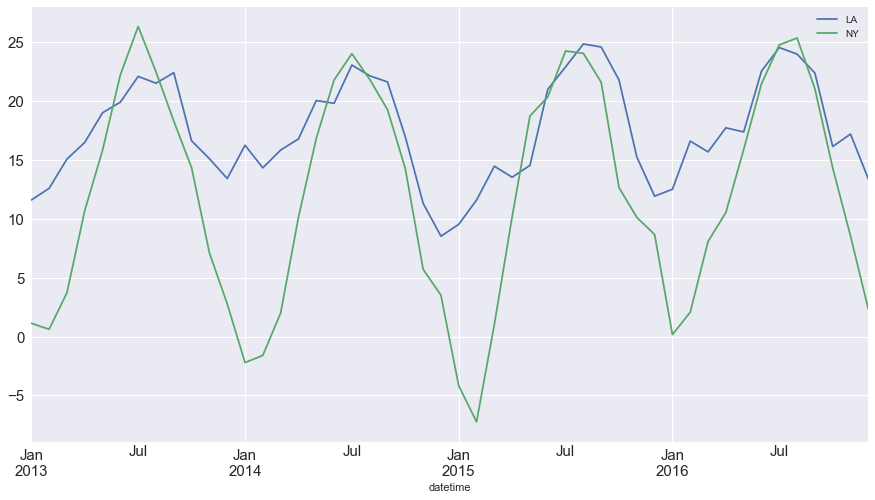

In [33]:
temp_m.plot(figsize = (15, 8), fontsize = 15) # PLOT with PERIOD INDEX with aggregated values!!!
plt.show()

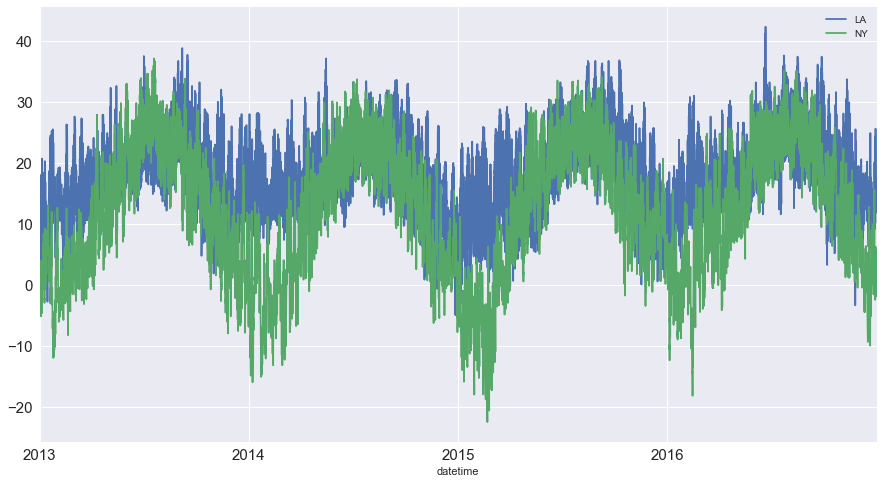

In [34]:
temp.plot(figsize = (15, 8), fontsize = 15)
plt.show()

### The PeriodIndex Object

In [35]:
import pandas as pd

In [36]:
temp = pd.read_csv("temp.csv", parse_dates= ["datetime"], index_col = "datetime")

In [37]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [38]:
temp.tail()

,LA,NY
datetime,,
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8
2016-12-31 22:00:00,12.3,5.7
2016-12-31 23:00:00,11.9,5.5


In [39]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [40]:
temp_m = temp.resample("M", kind = "period").mean() # If kind=timestamp, the issue below would NOT HAPPEN!!!
temp_m.head(12)

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376
2013-09,22.404861,18.291806


In [41]:
temp_m.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 48 entries, 2013-01 to 2016-12
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      48 non-null     float64
 1   NY      48 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [42]:
temp_m.index

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
             '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
             '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
             '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'],
            dtype='period[M]', name='datetime', freq='M')

In [43]:
temp_m.loc["2013-01"]

LA    11.596237
NY     1.129570
Name: 2013-01, dtype: float64

In [44]:
temp_m.loc["2013-05":"2013-08"]

,LA,NY
datetime,,
2013-05,19.005780,15.824328
2013-06,19.905417,22.225694
2013-07,22.093952,26.329704
2013-08,21.513172,22.480376


In [45]:
temp_m.loc["2013"] # Only returns the very first Period Index!!!

LA    11.596237
NY     1.129570
Name: 2013-01, dtype: float64

In [46]:
temp_m.to_timestamp(how = "start") # Revert to datetime/timestamp index!

,LA,NY
datetime,,
2013-01-01,11.596237,1.129570
2013-02-01,12.587202,0.617857
2013-03-01,15.069946,3.719220
2013-04-01,16.487361,10.699306
2013-05-01,19.005780,15.824328
2013-06-01,19.905417,22.225694
2013-07-01,22.093952,26.329704
2013-08-01,21.513172,22.480376
2013-09-01,22.404861,18.291806


### Advanced Indexing with reindex()

In [47]:
import pandas as pd

In [48]:
temp = pd.read_csv("temp.csv", parse_dates= ["datetime"], index_col = "datetime")

In [49]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [50]:
temp.tail()

,LA,NY
datetime,,
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8
2016-12-31 22:00:00,12.3,5.7
2016-12-31 23:00:00,11.9,5.5


In [51]:
temp_d = temp.resample("D").mean()
temp_d

,LA,NY
datetime,,
2013-01-01,8.858333,-0.404167
2013-01-02,9.283333,3.208333
2013-01-03,10.304167,-2.425000
2013-01-04,11.512500,-2.070833
2013-01-05,11.083333,0.816667
...,...,...
2016-12-27,12.154167,10.579167
2016-12-28,14.433333,4.016667
2016-12-29,16.045833,1.312500


In [58]:
birthd = pd.date_range(end = "2018-12-24", periods = 10,  freq = pd.DateOffset(years = 1))
birthd

DatetimeIndex(['2009-12-24', '2010-12-24', '2011-12-24', '2012-12-24',
               '2013-12-24', '2014-12-24', '2015-12-24', '2016-12-24',
               '2017-12-24', '2018-12-24'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [57]:
#temp_d.loc[birthd] # LOC Cannot pass a list of indexes to search!!!

In [59]:
temp_d.reindex(birthd) # Searches for multiple indexes!!!

,LA,NY
2009-12-24,NaN,NaN
2010-12-24,NaN,NaN
2011-12-24,NaN,NaN
2012-12-24,NaN,NaN
2013-12-24,16.158333,3.487500
2014-12-24,10.712500,8.045833
2015-12-24,10.716667,17.462500
2016-12-24,11.820833,4.045833
2017-12-24,NaN,NaN
2018-12-24,NaN,NaN


In [60]:
temp_d.head()

,LA,NY
datetime,,
2013-01-01,8.858333,-0.404167
2013-01-02,9.283333,3.208333
2013-01-03,10.304167,-2.425000
2013-01-04,11.512500,-2.070833
2013-01-05,11.083333,0.816667


In [61]:
temp_d.tail()

,LA,NY
datetime,,
2016-12-27,12.154167,10.579167
2016-12-28,14.433333,4.016667
2016-12-29,16.045833,1.312500
2016-12-30,15.933333,2.204167
2016-12-31,13.275000,1.204167
